# Análise Energia Armazenada (EAR)

EAR é a energia associada ao volume de água disponível nos reservatórios.

Não é a energia em si, mas pode ser vista como um "potencial" do que pode ser gerado.

O EAR Máximo indica a energia que poderia ser gerada caso todos os reservatórios do sistema estivessem cheios.


## Referências

https://www.aedb.br/seget/arquivos/artigos15/772265.pdf

## Dados

Os dados estão agrupados por subsistema, uma vez que o PLD é dividido dessa forma, então acredito que dessa forma é como o EAR pode influenciar na formação do PLD.

Estes dados foram retirados da base de dados aberta da ONS e estão disponíveis em https://dados.ons.org.br/dataset/ear-diario-por-subsistema


In [49]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

plt.rcParams['figure.figsize'] = [15,7]

BASE_PATH = '/home/capaci/Documents/mba-usp/tcc/tcc-mba-cd-icmc'


In [50]:
filepath = os.path.join(BASE_PATH, 'data/external/ons/ear.csv')
df = pd.read_csv(filepath)

In [51]:
df.head()

,id_subsistema,nom_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
0,NE,NORDESTE,2001-01-01,49967.0,18699.0,37.419998
1,N,NORTE,2001-01-01,12311.0,9137.0,74.220001
2,SE,SUDESTE,2001-01-01,159081.0,46315.0,29.110001
3,S,SUL,2001-01-01,14176.0,12857.0,90.690002
4,NE,NORDESTE,2001-01-02,49967.0,18851.0,37.730000


In [52]:
df.columns

Index(['id_subsistema', 'nom_subsistema', 'ear_data', 'ear_max_subsistema',
       'ear_verif_subsistema_mwmes', 'ear_verif_subsistema_percentual'],
      dtype='object')

In [53]:
df = df.drop(columns=['nom_subsistema'])

In [54]:
sudeste = df.query('id_subsistema == "SE"')

In [55]:
sudeste = sudeste.set_index('ear_data')

In [56]:
sudeste

,id_subsistema,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
ear_data,,,,
2001-01-01,SE,159081.000000,46315.000000,29.110001
2001-01-02,SE,159081.000000,46850.000000,29.450001
2001-01-03,SE,159081.000000,47466.000000,29.840000
2001-01-04,SE,159081.000000,47957.000000,30.150000
2001-01-05,SE,159081.000000,48264.000000,30.340000
...,...,...,...,...
2019-12-27,SE,203567.078125,41268.140625,20.272499
2019-12-28,SE,203567.078125,41383.707031,20.329300
2019-12-29,SE,203567.078125,41548.265625,20.410101


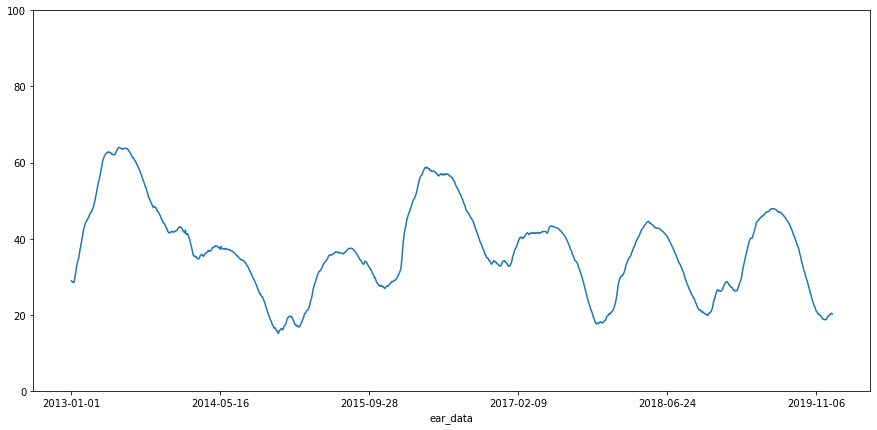

In [61]:
ax = sudeste['ear_verif_subsistema_percentual'].loc['2013':'2021'].plot()
ax.set_ylim(0, 100)

plt.show()

In [59]:
df

,id_subsistema,ear_data,ear_max_subsistema,ear_verif_subsistema_mwmes,ear_verif_subsistema_percentual
0,NE,2001-01-01,49967.000000,18699.000000,37.419998
1,N,2001-01-01,12311.000000,9137.000000,74.220001
2,SE,2001-01-01,159081.000000,46315.000000,29.110001
3,S,2001-01-01,14176.000000,12857.000000,90.690002
4,NE,2001-01-02,49967.000000,18851.000000,37.730000
...,...,...,...,...,...
27751,S,2019-12-30,19897.046875,5999.889160,30.154699
27752,NE,2019-12-31,51602.070312,19562.630859,37.910599
27753,N,2019-12-31,15164.886719,2288.260986,15.089200
27754,SE,2019-12-31,203567.078125,41099.570312,20.189699


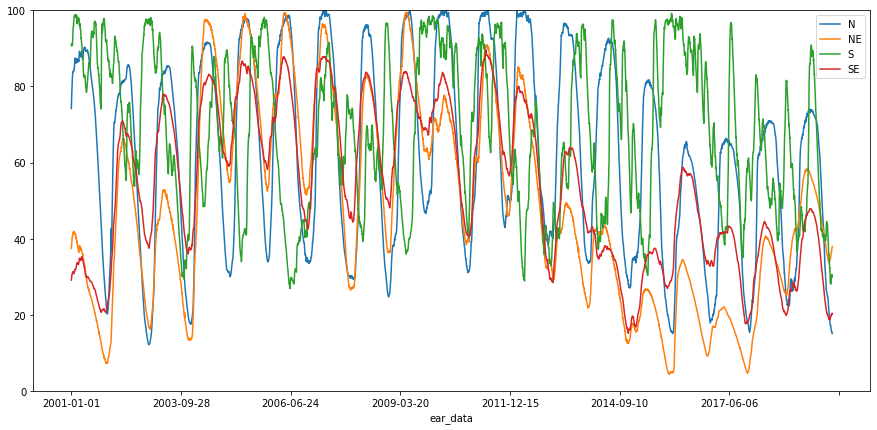

In [62]:
axs = df.set_index('ear_data').groupby('id_subsistema')['ear_verif_subsistema_percentual'].plot(legend=True)


for ax in axs:
    ax.set_ylim(0, 100)

plt.show()
